# PROCV - PYTHON

O dataset foi retirado da seguinte fonte:

[Remédios](https://dados.gov.br/dataset/preco-de-medicamentos-no-brasil-consumidor/resource/84531c98-b162-4c00-ae21-002192a51051)

**1) PROBLEMA:**

Queremos pelo número do código `ggrem` do remédio encontrar se está vendendo e a sua é a tarja!

**2) PROBLEMA:**

A empresa cresceu e o seu chefe precisou de algumas outras características e o volume de demanda por dia aumentou um pouco.

**3) PROBLEMA:**

A empresa cresceu ainda mais e o volume cresceu exponencialmente. Por isso, mudou-se a metodologia e seu chefe envia a demanda um dia antes e você envia o relatório por e-mail no dia posterior.


# Solução

## Problema 1

In [149]:
import pandas as pd

In [150]:
medicamentos = pd.read_csv('TA_PRECO_MEDICAMENTO.csv', sep=';', low_memory=False)
medicamentos.head()

,SUBST�NCIA,CNPJ,LABORAT�RIO,C�DIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTA��O,...,PMC 18% ALC,PMC 20%,RESTRI��O HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,AN�LISE RECURSAL,LISTA DE CONCESS�O DE CR�DITO TRIBUT�RIO (PIS/COFINS),COMERCIALIZA��O 2020,TARJA
0,SALICILATO DE FENILA;�CIDO SALIC�LICO;�XIDO DE...,33.379.884/0001-96,LABORATORIO SIMOES LTDA.,520500901178410,057600510011,7896210500354,-,-,TALCO AL�VIO,TALQUEIRA C/ 100 G,...,"8,50","9,70",N�o,N�o,N�o,N�o,NaN,Negativa,N�o,Tarja -(*)
1,DIENOGESTE;VALERATO DE ESTRADIOL,56.990.534/0001-67,SCHERING DO BRASIL QU�MICA E FARMAC�UTICA LTDA,530917060013104,1002001390025,7896116871497,-,-,CHARMELIE,COM REV A + COM REV B + COM REV C + COM REV D ...,...,"163,25","186,12",N�o,N�o,N�o,N�o,NaN,Negativa,N�o,Tarja Vermelha(*)
2,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMAC�UTICA LTDA.,525500402113310,1002900020141,7897337705905,-,-,CO-RENITEC,"20 MG + 12,5 MG COM CT BL AL/AL X 30",...,"73,78","75,62",N�o,N�o,N�o,N�o,NaN,Positiva,N�o,Tarja Vermelha
3,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMAC�UTICA LTDA.,525500401117312,1002900020158,7897337705912,-,-,CO-RENITEC,10 MG + 25 MG COM CT BL AL/AL X 30,...,"48,45","49,67",N�o,N�o,N�o,N�o,NaN,Positiva,N�o,Tarja Vermelha
4,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMAC�UTICA LTDA.,525502006118219,1002900050014,7897337706575,-,-,SINGULAIR,5 MG COM MAST CT 3 BL AL PLAS INC X 10,...,"75,32","77,20",N�o,N�o,N�o,N�o,NaN,Positiva,Sim,Tarja Vermelha


### Dados de entrada e saída

In [151]:
medicamentos.columns

Index(['SUBST�NCIA', 'CNPJ', 'LABORAT�RIO', 'C�DIGO GGREM', 'REGISTRO',
       'EAN 1', 'EAN 2', 'EAN 3', 'PRODUTO', 'APRESENTA��O',
       'CLASSE TERAP�UTICA', 'TIPO DE PRODUTO (STATUS DO PRODUTO)',
       'REGIME DE PRE�O', 'PF Sem Impostos', 'PF 0%', 'PF 12%', 'PF 17%',
       'PF 17% ALC', 'PF 17,5%', 'PF 17,5% ALC', 'PF 18%', 'PF 18% ALC',
       'PF 20%', 'PMC 0%', 'PMC 12%', 'PMC 17%', 'PMC 17% ALC', 'PMC 17,5%',
       'PMC 17,5% ALC', 'PMC 18%', 'PMC 18% ALC', 'PMC 20%',
       'RESTRI��O HOSPITALAR', 'CAP', 'CONFAZ 87', 'ICMS 0%',
       'AN�LISE RECURSAL',
       'LISTA DE CONCESS�O DE CR�DITO TRIBUT�RIO (PIS/COFINS)',
       'COMERCIALIZA��O 2020', 'TARJA'],
      dtype='object')

In [152]:
# entrada
entrada = 'C�DIGO GGREM'
# saidas
saida1, saida2 = 'COMERCIALIZA��O 2020', 'TARJA'

### Verificações do dados de saída

In [153]:
medicamentos[saida1].value_counts()

Sim    13383
N�o    12927
Name: COMERCIALIZA��O 2020, dtype: int64

In [154]:
medicamentos[saida2].unique()

array(['Tarja -(*)', 'Tarja Vermelha(*)', 'Tarja  Vermelha',
       'Tarja Vermelha (*)', 'Tarja Venda Livre',
       'Tarja Venda Livre/Sem Tarja (*)', 'Tarja  Preta', '- (*) ',
       'Tarja Preta(*)'], dtype=object)

### Tratamento da saida1

In [155]:
troca = {
    'Sim':'sim',
    'N�o':'nao'
}
medicamentos[saida1] = medicamentos[saida1].map(troca)

In [156]:
medicamentos[saida1]

0        nao
1        nao
2        nao
3        nao
4        sim
        ... 
26305    nao
26306    sim
26307    sim
26308    nao
26309    sim
Name: COMERCIALIZA��O 2020, Length: 26310, dtype: object

### Criando a lógica

In [157]:
medicamentos.sample()

,SUBST�NCIA,CNPJ,LABORAT�RIO,C�DIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTA��O,...,PMC 18% ALC,PMC 20%,RESTRI��O HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,AN�LISE RECURSAL,LISTA DE CONCESS�O DE CR�DITO TRIBUT�RIO (PIS/COFINS),COMERCIALIZA��O 2020,TARJA
18135,PREDNISOLONA,72.593.791/0001-11,NOVA QUIMICA FARMAC�UTICA S/A,525320070081207,1267503620067,7895296446068,-,-,PREDNISOLONA,20 MG COM CT BL AL AL X 10,...,"21,91","22,46",N�o,N�o,N�o,N�o,NaN,Positiva,nao,Tarja Vermelha(*)


In [158]:
amostra_aleatoria = 533519050032006

In [159]:
medicamentos.set_index(entrada, inplace=True, drop=False)

In [160]:
medicamentos.head()

,SUBST�NCIA,CNPJ,LABORAT�RIO,C�DIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTA��O,...,PMC 18% ALC,PMC 20%,RESTRI��O HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,AN�LISE RECURSAL,LISTA DE CONCESS�O DE CR�DITO TRIBUT�RIO (PIS/COFINS),COMERCIALIZA��O 2020,TARJA
C�DIGO GGREM,,,,,,,,,,,,,,,,,,,,,
520500901178410,SALICILATO DE FENILA;�CIDO SALIC�LICO;�XIDO DE...,33.379.884/0001-96,LABORATORIO SIMOES LTDA.,520500901178410,057600510011,7896210500354,-,-,TALCO AL�VIO,TALQUEIRA C/ 100 G,...,"8,50","9,70",N�o,N�o,N�o,N�o,NaN,Negativa,nao,Tarja -(*)
530917060013104,DIENOGESTE;VALERATO DE ESTRADIOL,56.990.534/0001-67,SCHERING DO BRASIL QU�MICA E FARMAC�UTICA LTDA,530917060013104,1002001390025,7896116871497,-,-,CHARMELIE,COM REV A + COM REV B + COM REV C + COM REV D ...,...,"163,25","186,12",N�o,N�o,N�o,N�o,NaN,Negativa,nao,Tarja Vermelha(*)
525500402113310,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMAC�UTICA LTDA.,525500402113310,1002900020141,7897337705905,-,-,CO-RENITEC,"20 MG + 12,5 MG COM CT BL AL/AL X 30",...,"73,78","75,62",N�o,N�o,N�o,N�o,NaN,Positiva,nao,Tarja Vermelha
525500401117312,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMAC�UTICA LTDA.,525500401117312,1002900020158,7897337705912,-,-,CO-RENITEC,10 MG + 25 MG COM CT BL AL/AL X 30,...,"48,45","49,67",N�o,N�o,N�o,N�o,NaN,Positiva,nao,Tarja Vermelha
525502006118219,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMAC�UTICA LTDA.,525502006118219,1002900050014,7897337706575,-,-,SINGULAIR,5 MG COM MAST CT 3 BL AL PLAS INC X 10,...,"75,32","77,20",N�o,N�o,N�o,N�o,NaN,Positiva,sim,Tarja Vermelha


In [161]:
# criando a lógica
medicamentos.loc[amostra_aleatoria, [saida1, saida2]]

COMERCIALIZA��O 2020                  nao
TARJA                   Tarja Vermelha(*)
Name: 533519050032006, dtype: object

**LOC:** Ajuda na localização de valores a partir do labels. Além disso, ele tem diversos recursos condicionais, para saber melhor verifique a [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html).
```python
# lógica
data_frame.loc[amostras_de_remedios, colunas_desejadas]
```

### Refatorando e melhorando o modelo

Vamos estilizar e melhorar a nossa saída para deixa-lá mais apresentável. Além disso, vamos capturar os erros caso o código digitado não esteja presentendo no dataframe.

In [216]:
def encontra_dados(codigo):
    try:
        frame = medicamentos.loc[codigo, [saida1, saida2]].to_frame()
        frame.index.name = 'Dados'
        frame.columns.name = 'CÓDIGO'
        frame = frame.T
        frame.rename(mapper={'COMERCIALIZA��O 2020':'STATUS VENDA'}, axis=1, inplace=True)
        return frame
    
    except:
        print(f'O {codigo} requerido é inválido!')

In [163]:
encontra_dados(amostra_aleatoria)

Dados,STATUS VENDA,TARJA
CÓDIGO,,
533519050032006,nao,Tarja Vermelha(*)


In [164]:
encontra_dados(45115454)

O 45115454 requerido é inválido!


## Problema 2


In [165]:
def encontra_dados_2(codigo, colunas):
    
    try:
        frame = medicamentos.loc[codigo, colunas].to_frame()
        frame.index.name = 'Dados'
        frame.columns.name = 'CÓDIGO'
        frame = frame.T
        
        frame.rename(mapper={'COMERCIALIZA��O 2020':'STATUS VENDA'}, axis=1, inplace=True)
        return frame
    
    except:
        print(f'O {codigo} requerido é inválido!')

def juntar_linhas(codigos, colunas):
    frame = pd.DataFrame()
    for codigo in codigos:
        linha = encontra_dados_2(codigo, colunas=colunas_pedidas)
        frame = frame.append(linha)
    return frame

In [167]:
# colunas pedidas
colunas_pedidas = ['CNPJ', 'REGISTRO', 'PF 17%', 'COMERCIALIZA��O 2020', 'TARJA']

In [168]:
# testando o nosso código
encontra_dados_2(amostra_aleatoria, colunas=colunas_pedidas)

Dados,CNPJ,REGISTRO,PF 17%,STATUS VENDA,TARJA
CÓDIGO,,,,,
533519050032006,30.222.814/0001-31,1039201920019,"17,19",nao,Tarja Vermelha(*)


In [169]:
# criando vários clientes
clientes_pedidos = medicamentos.sample(50, random_state=10).index.to_list()

In [170]:
# testando a nova função
juntar_linhas(clientes_pedidos, colunas_pedidas)

Dados,CNPJ,REGISTRO,PF 17%,STATUS VENDA,TARJA
CÓDIGO,,,,,
526120110125207,45.992.062/0001-65,1058309690071,"39,35",sim,Tarja Vermelha(*)
506713070051006,44.734.671/0001-51,1029803980020,NaN,sim,Tarja Vermelha
521905107114411,44.363.661/0001-57,1101302560106,"96,53",nao,Tarja Vermelha(*)
576720110090717,10.588.595/0010-92,1832604570028,"10,73",nao,Tarja -(*)
529920120070407,73.663.650/0001-90,1235202720031,"3891,24",sim,Tarja Vermelha(*)
541821030157306,57.507.378/0003-65,1023513330040,"71,40",nao,Tarja Vermelha(*)
569920070000607,24.633.934/0001-29,1650700040021,"620,61",sim,Tarja Vermelha(*)
506719070079817,44.734.671/0001-51,1029804860029,"27,23",sim,Tarja Vermelha (*)
541913090003306,33.781.055/0001-35,1106301320056,NaN,nao,Tarja Vermelha


### Refotorando o código novamente

Nesta etapa vamos melhos um pouco o nosso código

In [171]:
def encontra_dados_2(codigo, colunas):
    try:
        frame = medicamentos.loc[codigo, colunas].to_frame()
        frame.index.name = 'Dados'
        frame.columns.name = 'CÓDIGO'
        frame = frame.T
        frame.rename(mapper={'COMERCIALIZA��O 2020':'STATUS VENDA'}, axis=1, inplace=True)
        return frame
    except:
        return codigo

def juntar_linhas(codigos, colunas=[]):
    colunas_fixas =  ['C�DIGO GGREM', 'COMERCIALIZA��O 2020', 'TARJA']
    # criando variáveis auxiliares
    frame = pd.DataFrame()
    erros = []

    for codigo in codigos:
        linha = encontra_dados_2(codigo, colunas=colunas_fixas+colunas)
        if type(linha) == type(frame):
            frame = frame.append(linha)
        else:
            erros.append(linha)
    
    # verificação do erro
    if len(erros):
        print('tem erros')
    else:
        print('não tem erros')
    return frame, erros

In [172]:
import numpy as np

# criando uma lista com erros
clientes_com_erros = [
 576720070080017,
 np.nan,
 525320110092407,
 510617110059017,
 '504417060063306',
 531613090070306,
 5013,
 np.nan,
 505614120040613,
 528519040156603,
 525320120094107,
 533023501152412]

In [173]:
colunas_pedidas = ['CNPJ', 'REGISTRO', 'PF 17%']
clientes_pedidos = medicamentos.sample(10, random_state=10).index.to_list()

In [174]:
tabela1, missing1 = juntar_linhas(clientes_pedidos, ['PF 17%'])

não tem erros


In [175]:
tabela2, missing2 = juntar_linhas(clientes_com_erros, ['PF 17%'])

tem erros


In [176]:
missing2

[nan, '504417060063306', 5013, nan]

## Problema 3

In [183]:
tabela1, missing1 = juntar_linhas(clientes_pedidos, ['PF 17%'])

não tem erros


In [184]:
tabela1.sample(3)

Dados,C�DIGO GGREM,STATUS VENDA,TARJA,PF 17%
CÓDIGO,,,,
541913090003306,541913090003306,nao,Tarja Vermelha,NaN
506719070079817,506719070079817,sim,Tarja Vermelha (*),"27,23"
528518080137406,528518080137406,nao,Tarja Vermelha(*),"219,20"


In [179]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [187]:
def criar_pdf(tabela1):
    # criando uma tabela com o matplotlib
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis('tight')
    ax.axis('off')
    tabela = ax.table(cellText=tabela1.values, colLabels=tabela1.columns, loc='center' )

    # criando o arquivo pdf
    pdf = PdfPages('tabela_medicamentos.pdf')
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()

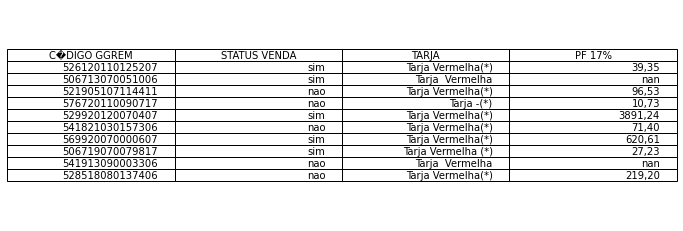

In [188]:
criar_pdf(tabela1)

## Enviando o e-mail para o chefe

In [214]:
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
from email.mime.base import MIMEBase 
from email import encoders 

def mandar_email(erro):
    if len(erro):
        erro_msg = f'Tem erros {len(erro)}'
    else:
        erro_msg = 'Não tem erros'
    # credenciais
    fromaddr = "ironbudlaegerbeer@gmail.com" # seu e-mail -> conta que vai enviar
    password = "123Iron456Beer789Gerber" # senha do seu e-mail
    toaddr = "lazaroscastro15@gmail.com" # e-mail do seu chefe

    # criando obj email
    msg = MIMEMultipart() 
    msg['From'] = fromaddr 
    msg['To'] = toaddr 
    msg['Subject'] = "Relatório diário final" # Título do e-mail
    body = "Olá, segue em anexo mais uma relatório." + erro_msg # corpo do e-mail
    msg.attach(MIMEText(body, 'plain')) 

    # configurações
    filename = "tabela_medicamentos.pdf" # caminho do arquivo pdf
    attachment = open(filename, "rb") 
    p = MIMEBase('application', 'octet-stream') 
    p.set_payload((attachment).read()) 
    encoders.encode_base64(p)  
    p.add_header('Content-Disposition', "attachment; filename= %s" % filename) 
    msg.attach(p) 
    s = smtplib.SMTP('smtp.gmail.com', 587) 
    s.starttls() 
    s.login(fromaddr, password) 
    text = msg.as_string() 
    s.sendmail(fromaddr, toaddr, text) 
    s.quit() 

In [193]:
mandar_email()

In [211]:
def encontra_dados_2(codigo, colunas):
    try:
        frame = medicamentos.loc[codigo, colunas].to_frame()
        frame.index.name = 'Dados'
        frame.columns.name = 'CÓDIGO'
        frame = frame.T
        frame.rename(mapper={'COMERCIALIZA��O 2020':'STATUS VENDA'}, axis=1, inplace=True)
        return frame
    except:
        return codigo

def juntar_linhas(codigos, colunas=[]):
    colunas_fixas =  ['C�DIGO GGREM', 'COMERCIALIZA��O 2020', 'TARJA']
    frame = pd.DataFrame()
    erros = []
    for codigo in codigos:
        linha = encontra_dados_2(codigo, colunas=colunas_fixas+colunas)
        if type(linha) == type(frame):
            frame = frame.append(linha)
        else:
            erros.append(linha)
    
    # verificação do erro
    if len(erros):
        print('tem erros')
    else:
        print('não tem erros')
    return frame, erros

## Solução final!

In [212]:
def trabalho_facil(codigos, colunas=[]):
    frame, erros = juntar_linhas(codigos, colunas)
    criar_pdf(frame)
    mandar_email(erro=erros)

tem erros


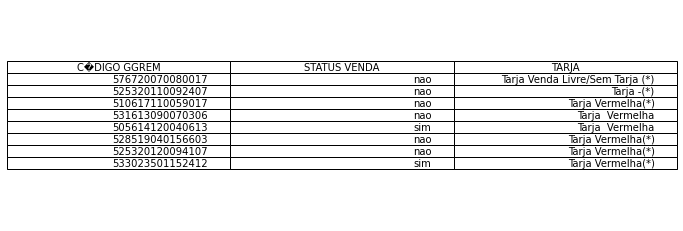

In [215]:
trabalho_facil(clientes_com_erros)